# Klasyfikacja tweetów Elona Muska

### Projekt realizuje grupa:

*  Wiktor Bajor **249459**
*  Adam Kubiak **249480**


### Opis wykonywanego zadania: 

&nbsp; W ramach projektu grupa będzie realizować zadanie klasyfikacji binarnej tweetów Elona Muska. Wykonywane zadanie będzie opierać się o zebranie tweetów sławnych ludzi, takich jak politycy, przedsiębiorcy, sportowcy, celebryci, influencerzy oraz Elon Musk. 
Akwizycja danych będzie realizowana poprzez publiczny interfejs programowania aplikacji (API), udostępniony przez Twitter.  Przy czym możliwa ilość tweetów do pobrania to pięćset tysięcy, co powinno być wystarczającą ilością danych. Dzięki udostępnionemu API można uzyskać dostęp do takich danych jak, treść publikacji, godzina publikacji, lokalizacja, ilość polubień czy ilość retweetów. Po ukończeniu etapu akwizycji danych kolejnym zadaniem, będzie przeanalizowanie tweetów, mając na uwadze takie elementy jak ilość retweetów, ilość polubień, występowanie pewnych słów kluczowych czy też sentyment umieszczonego tekstu. Na podstawie dokonanej analizy zostaną wybrane najbardziej charakterystyczne cechy tweetów Elona Muska. Ostatnim elementem projektu będzie utworzenie i wytrenowanie (na bazie wcześniej wybranych najbardziej istotny cech) klasyfikatora, który będzie oceniał czy dany tweet był napisany przez Elona Muska czy też nie. Wykonana analiza oraz klasyfikator mogłyby zostać wykorzystane do stworzenia cyfrowego sobowtóra Elona Muska. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

def plot_charts(data_frame, ylabels):
    fig = plt.figure(figsize=(13,10))
    fig.subplots_adjust(hspace=0.15,wspace=0.01)

    n_row = len(ylabels)
    n_col = 1
    for count, ylabel in enumerate(ylabels):
        ax = fig.add_subplot(n_row, n_col, count+1)
        ax.plot(data_frame["created at"].to_numpy(dtype='datetime64'), data_frame[ylabel].to_numpy())
        ax.set_ylabel(ylabel)
        
def get_data(path="user_data/basic*.csv"):
    all_files = glob.glob(path)
    df_from_each_file = (pd.read_csv(f) for f in all_files)
    return pd.concat(df_from_each_file, ignore_index=True)

data_frame = get_data()
data_frame["created at"] = pd.to_datetime(data_frame["created at"])

data_frame_elon = data_frame.loc[data_frame['is Elon Musk'] == True] 
data_frame_not_elon = data_frame.loc[data_frame['is Elon Musk'] == False] 

ylabels = ["like count","retweet count", 'quote count', 'reply count']


plot_charts(data_frame_elon, ylabels)
plot_charts(data_frame_not_elon, ylabels)


KeyError: 'is Elon musk'

In [ ]:
numeric_columns = ["like count","retweet count", 'quote count', 'reply count', 'sentiment']
data_frame.groupby(by='is Elon Musk')[numeric_columns].mean()

,like count,retweet count,quote count,reply count,sentiment
is Elon musk,,,,,
False,30230.912972,2865.954481,304.671226,1071.019811,0.158979
True,267535.212976,22973.414669,4230.071932,17934.578279,0.110371


In [ ]:
data_frame.groupby(by='is Elon Musk')[numeric_columns].median()

,like count,retweet count,quote count,reply count,sentiment
is Elon musk,,,,,
False,7827.5,672.5,53.0,482.5,0.097644
True,149631.0,10234.0,1230.0,9226.0,0.000000


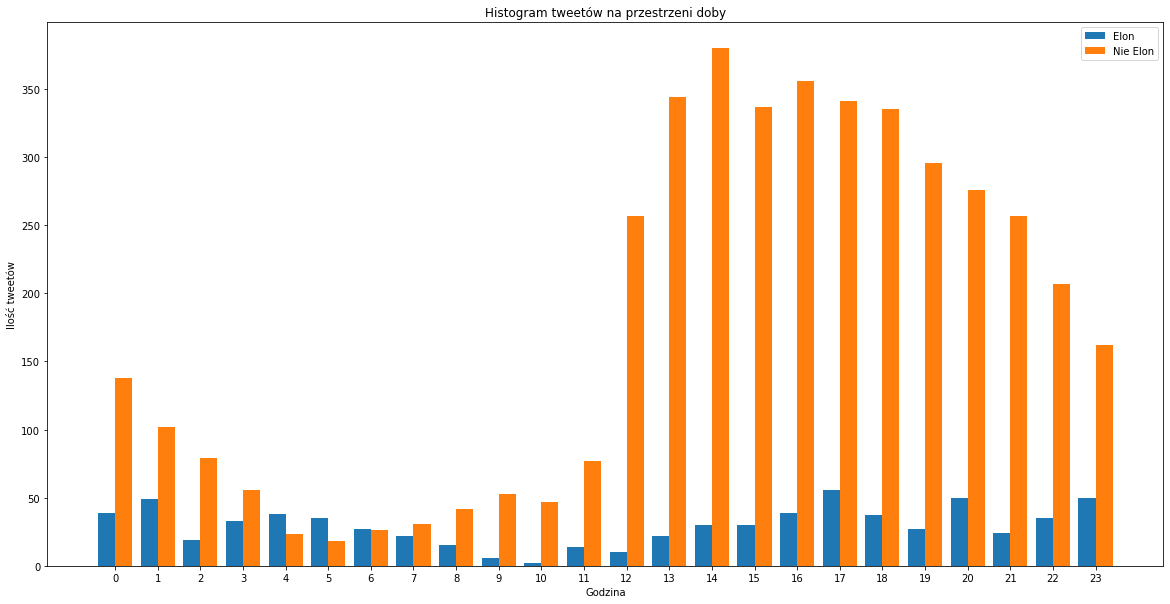

In [ ]:
data_frame_not_elon_count_by_hour = data_frame_not_elon['created at'].groupby(data_frame_not_elon['created at'].dt.hour).count()
elon_data_count_by_hour = data_frame_elon['created at'].groupby(data_frame_elon['created at'].dt.hour).count()

def fill_missing_hours_with_zero(data_count_by_hour_dict):
    for i in range(24):
        if i not in data_count_by_hour_dict:
            data_count_by_hour_dict[i] = 0
    
    data_count_by_hour_list = list(dict(sorted(data_count_by_hour_dict.items())).values())
    return np.array(data_count_by_hour_list).astype(float)

data_count_by_hour = fill_missing_hours_with_zero(data_frame_not_elon_count_by_hour.to_dict())

def plot_histogram_of_tweet_during_time(elon_data_count_by_hour, not_elon_data_count_by_hour, y_label, title):
    bar_width = 0.4
    hours = np.arange(24)
    plt.figure(figsize=(20, 10))
    plt.bar(hours - bar_width/2, elon_data_count_by_hour.values, width=bar_width, label='Elon')
    plt.bar(hours + bar_width/2, not_elon_data_count_by_hour, width=0.4, label='Nie Elon')

    plt.xticks(hours, hours)
    plt.xlabel("Godzina")
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

plot_histogram_of_tweet_during_time(elon_data_count_by_hour, data_count_by_hour, 'Ilość tweetów', 'Histogram tweetów na przestrzeni doby')

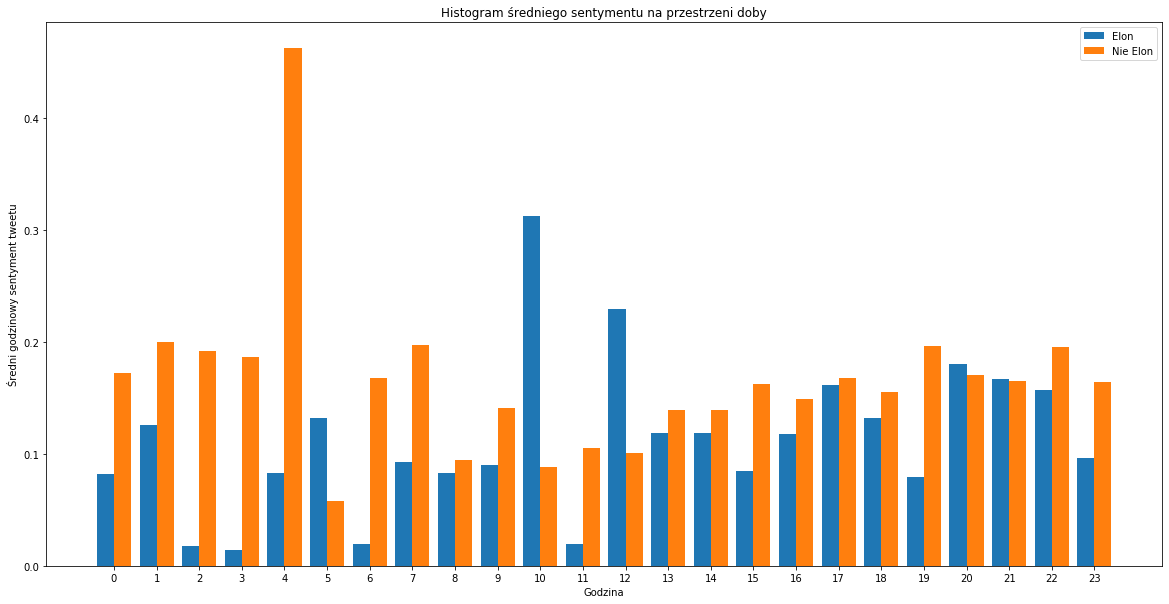

In [ ]:
elon_sentiment = data_frame_elon.groupby(data_frame_elon['created at'].dt.hour).describe()['sentiment']['mean']
not_elon_sentiment = data_frame_not_elon.groupby(data_frame_not_elon['created at'].dt.hour).describe()['sentiment']['mean']

data_count_by_hour = fill_missing_hours_with_zero(not_elon_sentiment.to_dict())
plot_histogram_of_tweet_during_time(elon_sentiment, data_count_by_hour, 'Średni godzinowy sentyment tweetu', 'Histogram średniego sentymentu na przestrzeni doby')


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


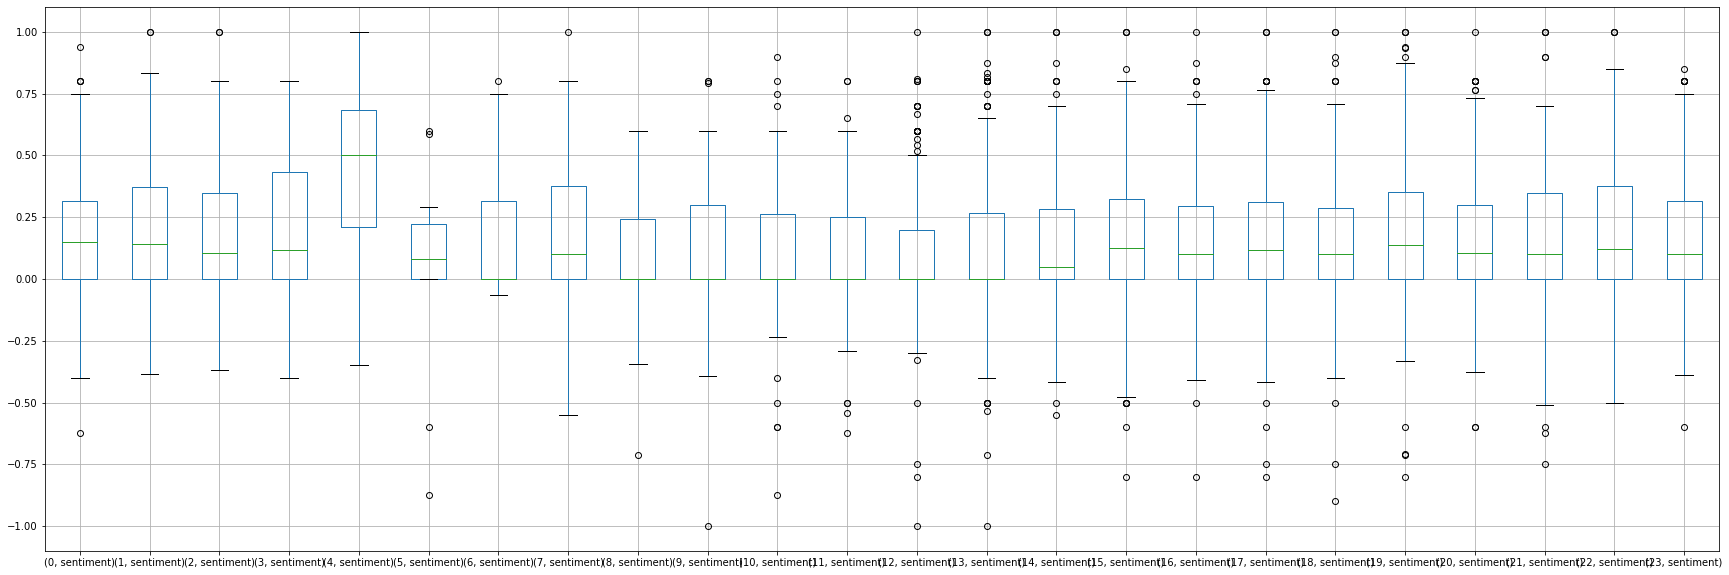

In [ ]:
data_frame_not_elon.groupby(data_frame_not_elon['created at'].dt.hour).boxplot(column='sentiment', subplots=False, figsize=(30,10))

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


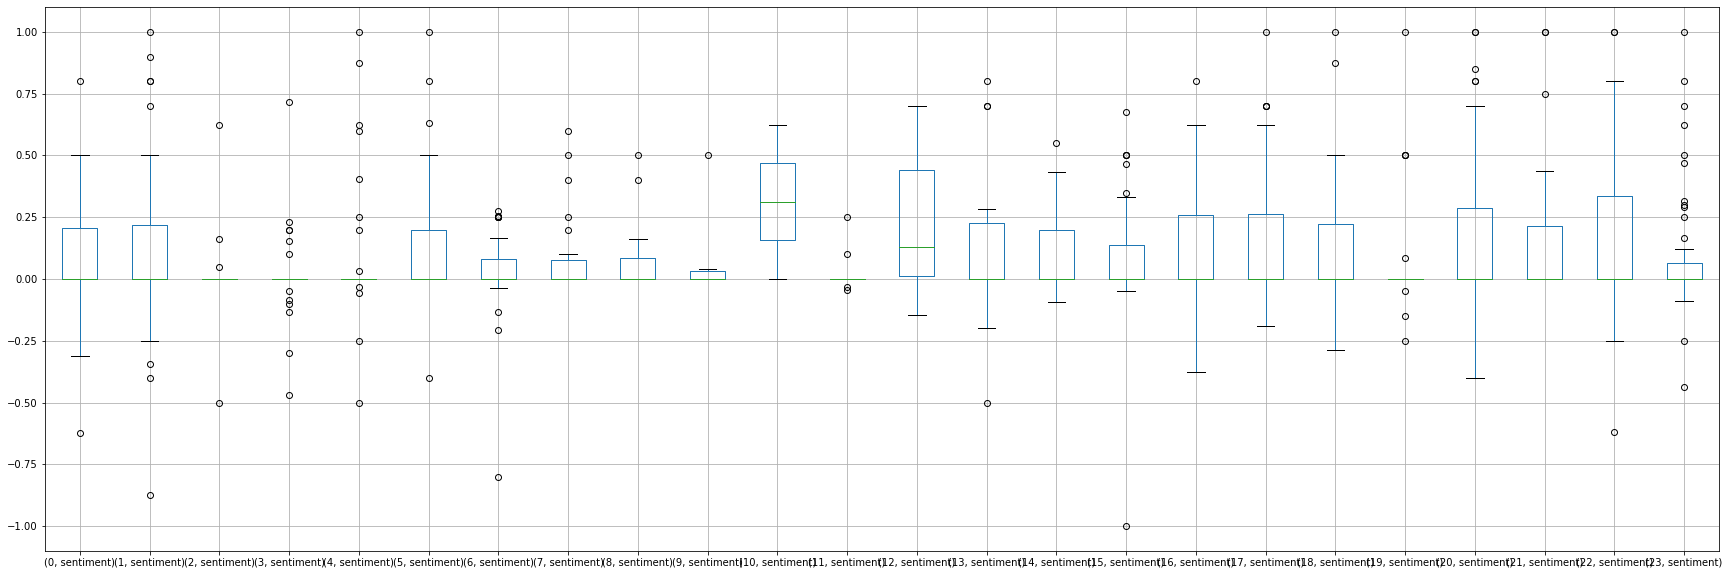

In [ ]:
data_frame_elon.groupby(data_frame_elon['created at'].dt.hour).boxplot(column='sentiment', subplots=False, figsize=(30,10))

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


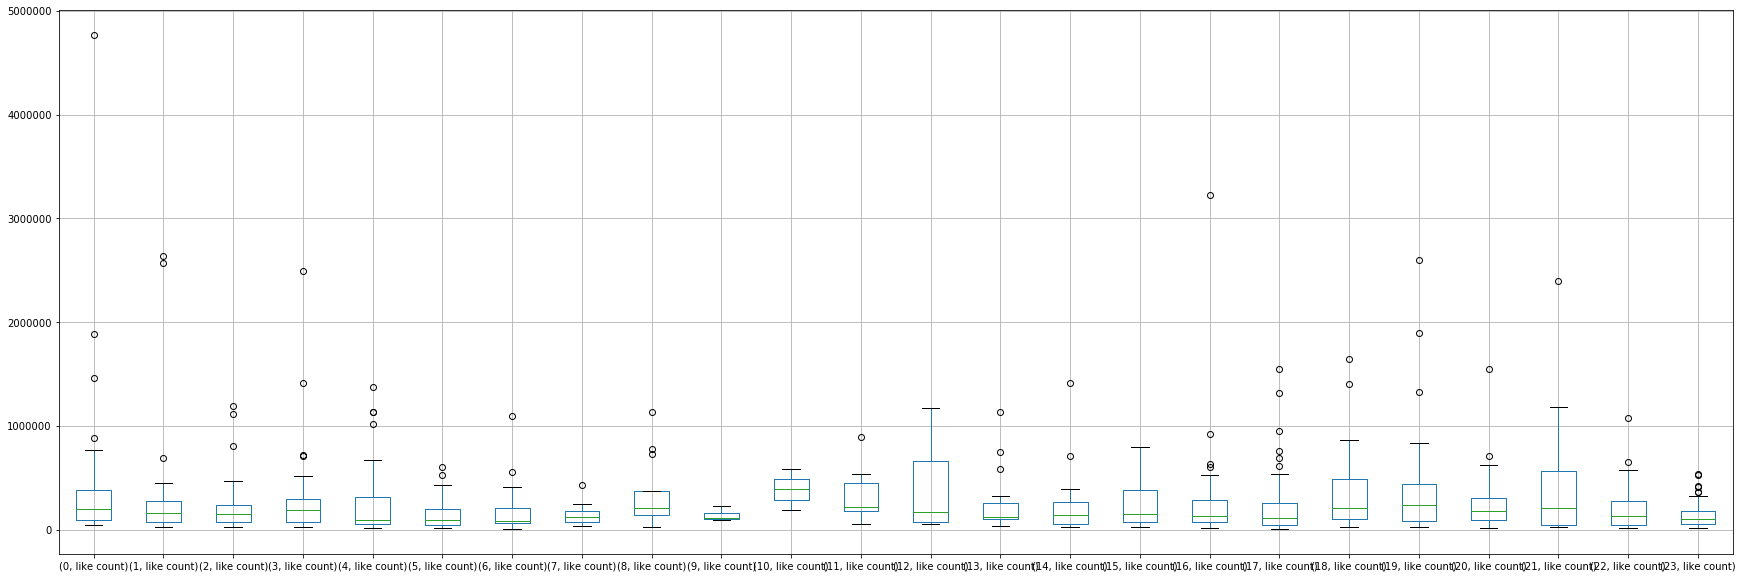

In [ ]:
data_frame_elon.groupby(data_frame_elon['created at'].dt.hour).boxplot(column='like count', subplots=False, figsize=(30,10))

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


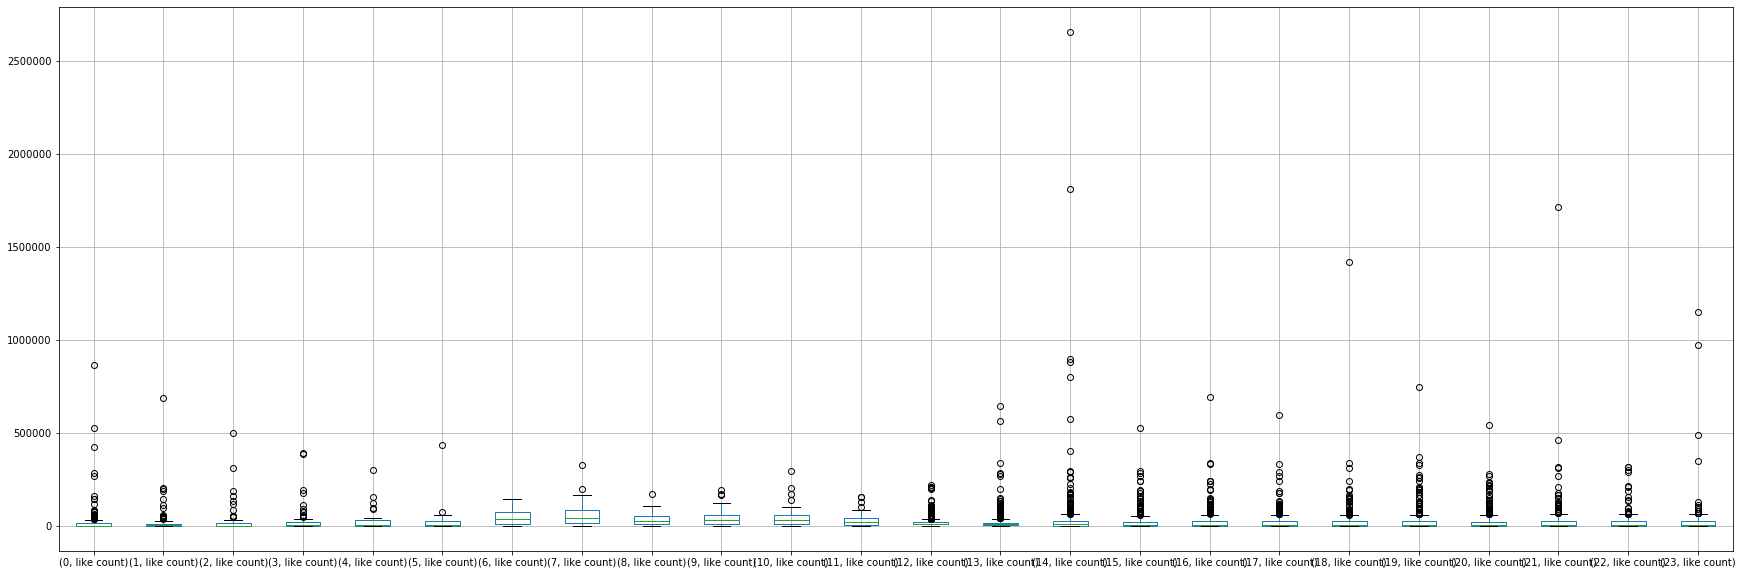

In [ ]:
data_frame_not_elon.groupby(data_frame_not_elon['created at'].dt.hour).boxplot(column='like count', subplots=False, figsize=(30,10))

In [ ]:
df = data_frame_elon.loc[data_frame_elon['lang'] != 'en']
# df = df[~df['text'].isna()]
df

,is Elon musk,created at,text,source,possibly sensitive,lang,sentiment,retweet count,reply count,like count,quote count
336,True,2022-11-12 07:36:39+00:00,🪦🤖,Twitter for iPhone,False,art,0.0,28234,32281,432470,7557
351,True,2022-11-10 16:41:54+00:00,NaN,Twitter for iPhone,False,zxx,0.0,19716,19946,319090,2474
356,True,2022-11-08 01:28:07+00:00,NaN,Twitter for iPhone,False,zxx,0.0,48909,47262,688334,9617
377,True,2022-11-05 17:26:42+00:00,NaN,Twitter for iPhone,False,zxx,0.0,12974,9050,152189,1333
389,True,2022-11-03 06:48:24+00:00,🎯,Twitter for iPhone,False,art,0.0,13035,9303,167413,819
...,...,...,...,...,...,...,...,...,...,...,...
1028,True,2022-03-25 01:15:13+00:00,NaN,Twitter for iPhone,False,zxx,0.0,4542,2660,57482,332
1032,True,2022-03-24 20:26:49+00:00,♥️♥️ NASA ♥️♥️,Twitter for iPhone,False,tl,0.0,6226,4748,85679,356
1034,True,2022-03-22 13:30:39+00:00,🇩🇪🇩🇪 Danke Deutschland!! 🇩🇪🇩🇪,Twitter for iPhone,False,de,0.0,14161,16524,273485,1786
1036,True,2022-03-19 08:35:46+00:00,NaN,Twitter for iPhone,False,zxx,0.0,66437,25861,781613,5018


In [ ]:
len(df.index) / len(data_frame_elon.index)

0.16784203102961917

In [ ]:
df2 = data_frame_not_elon.loc[data_frame_not_elon['lang'] != 'en']
# df2 = df2[~df2['text'].isna()]
df2

,is Elon musk,created at,text,source,possibly sensitive,lang,sentiment,retweet count,reply count,like count,quote count
5,False,2022-09-20 22:14:59+00:00,NaN,Twitter for iPhone,False,zxx,0.0,261,1849,2282,95
6,False,2022-09-10 18:33:46+00:00,NaN,Twitter for iPhone,False,zxx,0.0,423,1535,2571,70
23,False,2022-05-24 02:05:21+00:00,NaN,Twitter for iPhone,False,zxx,0.0,255,803,2972,48
37,False,2022-05-09 23:03:17+00:00,"Congrats, Katya!",Twitter for iPhone,False,hi,0.0,266,544,2776,50
51,False,2022-04-19 01:44:18+00:00,NaN,Twitter for iPhone,False,zxx,0.0,204,503,1884,158
...,...,...,...,...,...,...,...,...,...,...,...
4101,False,2021-11-01 12:30:47+00:00,Bronze. Iron. Steel. #Bitcoin,Twitter Web App,False,nl,0.0,767,543,9278,57
4102,False,2021-11-01 00:18:22+00:00,NaN,Twitter for iPhone,False,zxx,0.0,93,181,789,10
4227,False,2022-10-12 15:43:28+00:00,"Lea mi artículo en @LaOpinionLA, sobre lo que ...",Twitter for iPhone,False,es,0.0,75,219,386,19
4269,False,2022-09-29 00:34:23+00:00,Gracias a @GavinNewsom por apoyar a nuestros t...,Twitter for iPhone,False,es,0.0,64,130,366,2


In [ ]:
len(df2.index) / len(data_frame_not_elon.index)

0.0330188679245283

In [ ]:
print(data_frame_elon['source'].value_counts())
print(data_frame_not_elon['source'].value_counts())

Twitter for iPhone    709
Name: source, dtype: int64
Twitter for iPhone          2113
Twitter Web App             1527
Twitter Media Studio         220
Twitter Web Client           193
Sprout Social                 77
Emplifi                       72
Instagram                     19
Twitter for Android            9
Twitter Ads                    4
Meltwater Social               4
Vine - Make a Scene            1
Twitter for Advertisers.       1
Name: source, dtype: int64


In [ ]:
print(data_frame_elon['possibly sensitive'].value_counts())
print(data_frame_not_elon['possibly sensitive'].value_counts())

False    709
Name: possibly sensitive, dtype: int64
False    4238
True        2
Name: possibly sensitive, dtype: int64


In [ ]:
data_frame_annotations = get_data("user_data/annotations*.csv")
data_frame_annotations["created at"] = pd.to_datetime(data_frame["created at"])

data_frame_annotations_elon = data_frame_annotations.loc[data_frame_annotations['is Elon Musk'] == True] 
data_frame_annotations_not_elon = data_frame_annotations.loc[data_frame_annotations['is Elon Musk'] == False] 

In [ ]:
print(data_frame_annotations_elon['context annotations domain 0'].value_counts())
print('\n\n')
print(data_frame_annotations_elon['context annotations entity 0'].value_counts())

print('\n\n\n')

print(data_frame_annotations_not_elon['context annotations domain 0'].value_counts())
print('\n\n')
print(data_frame_annotations_not_elon['context annotations entity 0'].value_counts())


Person                            377
Business Taxonomy                 231
Entities [Entity Service]          26
Unified Twitter Taxonomy           21
Video Game                         12
Events [Entity Service]             8
Interests and Hobbies               7
Brand                               6
TV Shows                            5
Brand Vertical                      5
Interests and Hobbies Category      2
Ongoing News Story                  2
Multimedia Franchise                1
Podcast                             1
Interests and Hobbies Vertical      1
Movie                               1
Political Body                      1
Cities                              1
Name: context annotations domain 0, dtype: int64



Elon Musk                                                       371
Financial Services Business                                     223
Aerospace                                                        17
Starlink: Battle for Atlas                                  